In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pistachio_data = pd.read_csv('data/pistachio.csv')
pistachio_data.columns = pistachio_data.columns.str.lower()
pistachio_data.head()

,area,perimeter,major_axis,minor_axis,eccentricity,eqdiasq,solidity,convex_area,extent,aspect_ratio,roundness,compactness,shapefactor_1,shapefactor_2,shapefactor_3,shapefactor_4,class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [3]:
pistachio_data.shape

(1718, 17)

In [4]:
pistachio_data.dtypes

area               int64
perimeter        float64
major_axis       float64
minor_axis       float64
eccentricity     float64
eqdiasq          float64
solidity         float64
convex_area        int64
extent           float64
aspect_ratio     float64
roundness        float64
compactness      float64
shapefactor_1    float64
shapefactor_2    float64
shapefactor_3    float64
shapefactor_4    float64
class             object
dtype: object

In [5]:
pistachio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           1718 non-null   int64  
 1   perimeter      1718 non-null   float64
 2   major_axis     1718 non-null   float64
 3   minor_axis     1718 non-null   float64
 4   eccentricity   1718 non-null   float64
 5   eqdiasq        1718 non-null   float64
 6   solidity       1718 non-null   float64
 7   convex_area    1718 non-null   int64  
 8   extent         1718 non-null   float64
 9   aspect_ratio   1718 non-null   float64
 10  roundness      1718 non-null   float64
 11  compactness    1718 non-null   float64
 12  shapefactor_1  1718 non-null   float64
 13  shapefactor_2  1718 non-null   float64
 14  shapefactor_3  1718 non-null   float64
 15  shapefactor_4  1718 non-null   float64
 16  class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

In [6]:
pistachio_data['class'].replace(
    ['Kirmizi_Pistachio', 'Siit_Pistachio'],
    [0, 1],
    inplace=True
    )

In [7]:
pistachio_data.describe().T

,count,mean,std,min,25%,50%,75%,max
area,1718.0,79871.952852,12968.217051,29808.0000,71898.500000,79795.00000,88980.000000,124008.0000
perimeter,1718.0,1421.797588,373.408835,858.3630,1169.633225,1260.78550,1599.479000,2755.0491
major_axis,1718.0,446.206444,31.885328,321.4255,426.554100,448.45315,467.515200,535.6422
minor_axis,1718.0,238.193128,30.426445,133.5096,217.875475,235.88875,257.433625,383.0461
eccentricity,1718.0,0.840347,0.049026,0.5049,0.817500,0.85025,0.875375,0.9460
eqdiasq,1718.0,317.790000,26.571699,194.8146,302.562375,318.74465,336.590000,397.3561
solidity,1718.0,0.940103,0.050006,0.5880,0.920250,0.95380,0.976300,0.9951
convex_area,1718.0,84947.671129,13081.742551,37935.0000,76357.750000,84973.00000,93660.750000,132478.0000
extent,1718.0,0.716055,0.052534,0.4272,0.688100,0.72610,0.753600,0.8204
aspect_ratio,1718.0,1.899342,0.241253,1.1585,1.736325,1.89955,2.068575,3.0858


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'perimeter'}>,
        <Axes: title={'center': 'major_axis'}>,
        <Axes: title={'center': 'minor_axis'}>],
       [<Axes: title={'center': 'eccentricity'}>,
        <Axes: title={'center': 'eqdiasq'}>,
        <Axes: title={'center': 'solidity'}>,
        <Axes: title={'center': 'convex_area'}>],
       [<Axes: title={'center': 'extent'}>,
        <Axes: title={'center': 'aspect_ratio'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'compactness'}>],
       [<Axes: title={'center': 'shapefactor_1'}>,
        <Axes: title={'center': 'shapefactor_2'}>,
        <Axes: title={'center': 'shapefactor_3'}>,
        <Axes: title={'center': 'shapefactor_4'}>],
       [<Axes: title={'center': 'class'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

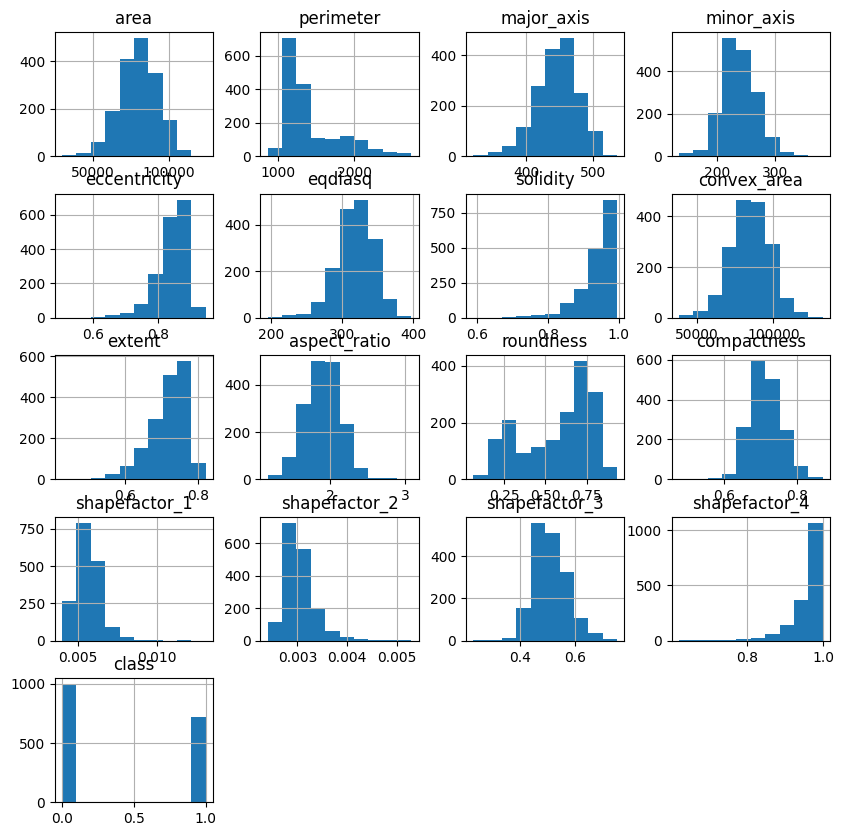

In [8]:
pistachio_data.hist(figsize=(10,10))

<Axes: xlabel='class', ylabel='count'>

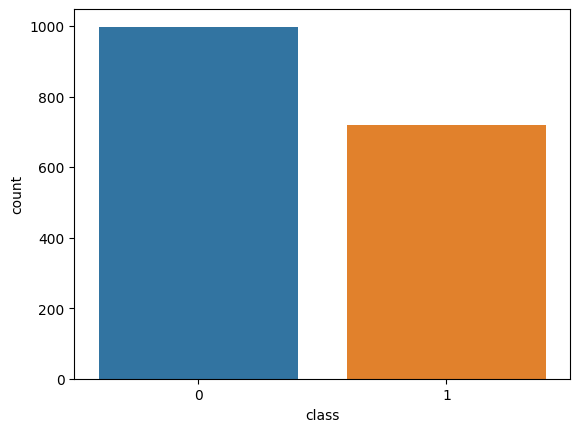

In [9]:
sns.countplot(x='class', data=pistachio_data)

In [10]:
pistachio_data['class'].unique()

array([0, 1], dtype=int64)

In [11]:
pistachio_data['class'].value_counts().to_frame()
clas_dict=[{'Kirmizi_Pistachio': 998}, {'Siit_Pistachio': 720}]
clas_dict

[{'Kirmizi_Pistachio': 998}, {'Siit_Pistachio': 720}]

In [12]:
pistachio_data.duplicated().sum()

0

array([[<Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='perimeter', ylabel='area'>,
        <Axes: xlabel='major_axis', ylabel='area'>,
        <Axes: xlabel='minor_axis', ylabel='area'>,
        <Axes: xlabel='eccentricity', ylabel='area'>,
        <Axes: xlabel='eqdiasq', ylabel='area'>,
        <Axes: xlabel='solidity', ylabel='area'>,
        <Axes: xlabel='convex_area', ylabel='area'>,
        <Axes: xlabel='extent', ylabel='area'>,
        <Axes: xlabel='aspect_ratio', ylabel='area'>,
        <Axes: xlabel='roundness', ylabel='area'>,
        <Axes: xlabel='compactness', ylabel='area'>,
        <Axes: xlabel='shapefactor_1', ylabel='area'>,
        <Axes: xlabel='shapefactor_2', ylabel='area'>,
        <Axes: xlabel='shapefactor_3', ylabel='area'>,
        <Axes: xlabel='shapefactor_4', ylabel='area'>,
        <Axes: xlabel='class', ylabel='area'>],
       [<Axes: xlabel='area', ylabel='perimeter'>,
        <Axes: xlabel='perimeter', ylabel='perimeter'>,
        <Axe

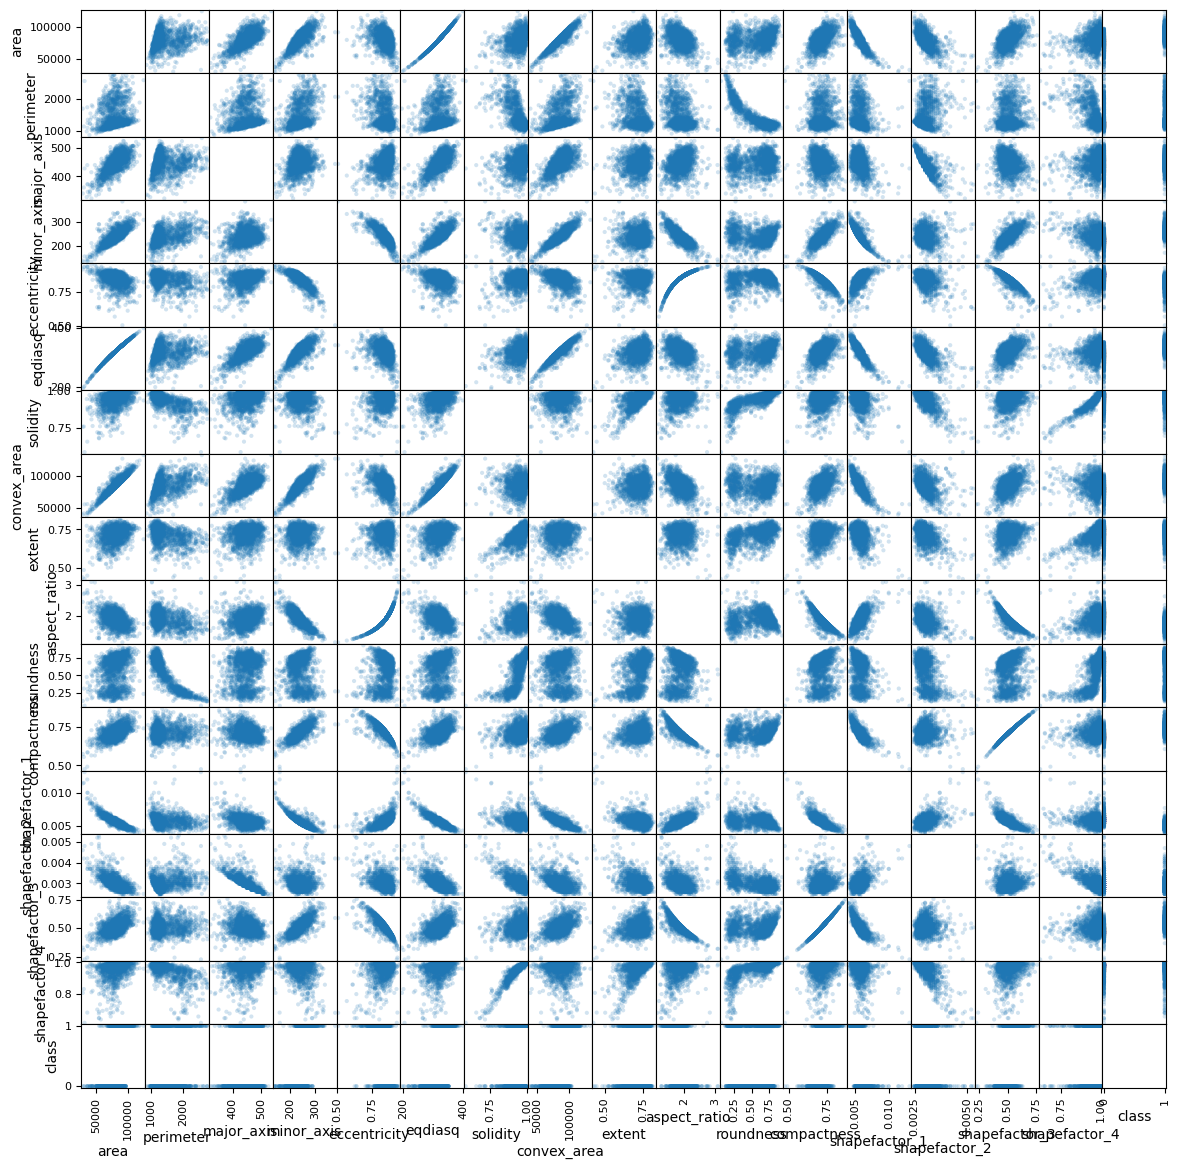

In [13]:
pd.plotting.scatter_matrix(pistachio_data, alpha=0.2, figsize=(14,14), diagonal='class')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_fulltrain, df_test = train_test_split(pistachio_data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_fulltrain, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train['class'].values
y_val = df_val['class'].values
y_test = df_test['class'].values

del df_train['class']
del df_val['class']
del df_test['class']

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [17]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [78]:
dv = DictVectorizer()
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.fit(df_val.to_dict(orient='records'))
X_test = dv.fit(df_test.to_dict(orient='records'))

In [22]:
import mlflow

In [27]:
MLFLOW_TRACKING_URI = "sqlite:///MLopsZC2023.db"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [ ]:
mlflow.set_experiment("pistachio-classifier")

for C in [1, 2, 4, 8]:
    for max_iter in [20, 50, 100, 200, 500, 1000]:
            for solver in ['lbfgs', 'liblinear', 'sag', 'saga']:
                for class_weight in [{1: 998}, 'balanced']:
                    with mlflow.start_run():
                        params = {
                        'max_iter': max_iter,
                        'solver': solver,
                        'class_weight': class_weight,
                        'C': C
                        }
                        mlflow.log_params(params)

                        pipeline = make_pipeline(
                            DictVectorizer(),
                            LogisticRegression(
                                 C=C,
                                 solver=solver,
                                 class_weight=class_weight,
                                 max_iter=max_iter,
                                 random_state=1,
                                 verbose=1,
                                 n_jobs=-1
                                 )
                            )

                        pipeline.fit(dict_train, y_train)
                        y_pred = pipeline.predict(dict_val)

                        auc = roc_auc_score(y_val, y_pred)
                        print(params, auc)

                        mlflow.log_metric('val_AUC', auc)

                        mlflow.sklearn.log_model(pipeline, artifact_path="model")

In [45]:
from mlflow.entities import ViewType

runs = client.search_runs(
    experiment_ids='1',
    run_view_type=ViewType.ACTIVE_ONLY,
    max_results=5,
    order_by=["metrics.val_AUC DESC"]
)

In [49]:
for run in runs:
    print(f"run id: {run.info.run_id},\nparameters: {run.data.params},\nValidation AUC: {run.data.metrics['val_AUC']:.4f}")

run id: 8320742be33a412eadffd1e26c3aeee4,
parameters: {'max_iter': '20', 'solver': 'liblinear', 'class_weight': 'balanced', 'C': '8'},
AUC: 0.8713
run id: 2de1523d2db94ed2ab7caa054e85358e,
parameters: {'max_iter': '20', 'solver': 'liblinear', 'class_weight': 'balanced', 'C': '4'},
AUC: 0.8713
run id: e49d1dd1be2444b483a63eaf176a02dc,
parameters: {'max_iter': '20', 'solver': 'liblinear', 'class_weight': 'balanced', 'C': '2'},
AUC: 0.8713
run id: babf172bf7954706b1a10d0f43d44fc0,
parameters: {'max_iter': '20', 'solver': 'liblinear', 'class_weight': 'balanced', 'C': '1'},
AUC: 0.8713
run id: 24d14ec3881845948038b29ce5b7ddf5,
parameters: {'max_iter': '1000', 'solver': 'lbfgs', 'class_weight': 'balanced', 'C': '8'},
AUC: 0.8687


In [68]:
run_id = 'babf172bf7954706b1a10d0f43d44fc0'
model_uri = f"runs:/{run_id}/model"
mlflow.register_model(model_uri=model_uri, name="pistachio_classifier")

In [82]:
logged_model = f'runs:/{run_id}/model'
model = mlflow.pyfunc.load_model(logged_model)

In [124]:
filename = 'pistachio_classifier_model.bin'
pickle.dump( model, open(f'model/{filename}', 'wb'))